# Segmenting with PCA

In this activity, you will use your knowledge of PCA to reduce the dimensionality of the the customers DataFrame you used before, and then compare that result to the segmentation of the data using all of the factors.

In [1]:
# Import the modules
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans

## Read in the CSV file and prepare the Pandas DataFrame

In [2]:
# Read the csv file into a pandas DataFrame
customers_transformed_df = pd.read_csv(
    Path("../Resources/customers.csv")
)

# Review the DataFrame
customers_transformed_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,1.148534,4.606077,2.699069,-2.661824,1.526433,1.236671,0.211421,1.482896,-4.445627,-1.936831
1,-1.149410,-1.650549,2.530167,-3.227088,0.572138,4.162600,-0.291679,-1.237575,3.604765,-1.635689
2,0.332427,-0.887985,-0.309216,0.399891,0.828492,3.641945,-0.916946,-1.978024,1.056772,-1.882747
3,2.245599,3.826309,0.264039,0.095471,1.984380,0.373991,-0.280279,1.602786,-5.993331,-2.258925
4,0.705503,-1.312329,0.895406,-0.405408,1.116187,3.699562,-1.427985,-1.494409,1.156908,-1.434964


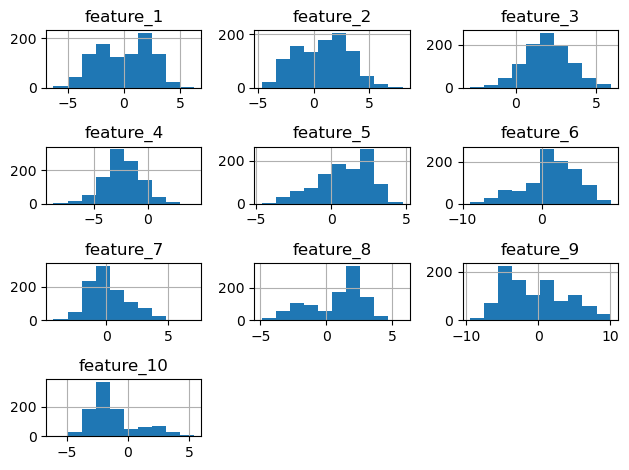

In [3]:
import matplotlib.pyplot as plt
customers_transformed_df.hist()
plt.tight_layout()

In [4]:
import seaborn as sns
customers_transformed_df.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
feature_1,1.000000,0.430979,0.024915,0.662063,0.858612,0.044114,-0.818070,0.415932,-0.862167,-0.295134
feature_2,0.430979,1.000000,-0.009242,0.315622,0.097238,-0.571969,0.063247,0.607595,-0.768265,0.266261
feature_3,0.024915,-0.009242,1.000000,-0.653050,0.061420,0.177778,-0.212373,0.014921,0.112808,0.159025
feature_4,0.662063,0.315622,-0.653050,1.000000,0.412961,-0.134281,-0.464384,0.165242,-0.619810,-0.097279
feature_5,0.858612,0.097238,0.061420,0.412961,1.000000,0.415817,-0.826255,0.208853,-0.625959,-0.708458
feature_6,0.044114,-0.571969,0.177778,-0.134281,0.415817,1.000000,-0.518717,-0.763257,0.374516,-0.749654
feature_7,-0.818070,0.063247,-0.212373,-0.464384,-0.826255,-0.518717,1.000000,0.097943,0.416330,0.436528
feature_8,0.415932,0.607595,0.014921,0.165242,0.208853,-0.763257,0.097943,1.000000,-0.728892,0.279994
feature_9,-0.862167,-0.768265,0.112808,-0.619810,-0.625959,0.374516,0.416330,-0.728892,1.000000,0.078743
feature_10,-0.295134,0.266261,0.159025,-0.097279,-0.708458,-0.749654,0.436528,0.279994,0.078743,1.000000


## Part 1: Use PCA to reduce the dimensionality of the transformed customers DataFrame to 2 principal components

### Step 1: Import the PCA module from SKLearn

In [5]:
# Import the PCA module
# YOUR CODE HERE
from sklearn.decomposition import PCA

### Step 2: Instantiate the instace of the PCA model declaring the number of principal components as 2

In [6]:
# Instantiate the PCA instance and declare the number of PCA variables
# YOUR CODE HERE
pca=PCA(n_components=2)

### Step 3: Using the `fit_transform` function from PCA, fit the PCA model to the `customers_transformed_df` DataFrame. Review the first 5 rows of list data.

In [7]:
# Fit the PCA model on the transformed credit card DataFrame
# YOUR CODE HERE
pca.fit(customers_transformed_df)
pca_data=pca.transform(customers_transformed_df)

# Review the first 5 rows of the array of list data
# YOUR CODE HERE
pca_data[:5]

array([[-4.72382358, -0.60489964],
       [ 5.85571568, -1.98331135],
       [ 2.43063042, -3.15456594],
       [-6.96050326, -1.35772617],
       [ 2.47746793, -3.29412896]])

### Step 4: Using the `explained_variance_ratio_` function from PCA, calculate the percentage of the total variance that is captured by the two PCA variables.  

In [8]:
# Calculate the PCA explained variance ratio
# YOUR CODE HERE
pca.explained_variance_ratio_

array([0.55083554, 0.30256389])

**Question:** What is the explained variance ratio captured by the two PCA variables?
    
**Answer:** YOUR ANSWER HERE

### Step 5: Using the `customer_pca` data, create a Pandas DataFrame called `customers_pca_df`. The columns of the DataFrame should be called "PCA1" and "PCA2".

In [9]:
# Create the PCA DataFrame
# YOUR CODE HERE
customers_pca_df=pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

# Review the PCA DataFrame
# YOUR CODE HERE)
customers_pca_df

,PCA1,PCA2
0,-4.723824,-0.604900
1,5.855716,-1.983311
2,2.430630,-3.154566
3,-6.960503,-1.357726
4,2.477468,-3.294129
...,...,...
995,-5.043771,0.359059
996,7.543447,-4.106911
997,-3.465547,0.338280
998,10.652567,-1.156630


## Part 2: Using the `customers_pca_df` Dataframe, utilize the elbow method to determine the optimal value of k.

In [10]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [11]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # YOUR CODE HERE
    km=KMeans(n_clusters=i)
    km.fit(customers_pca_df)
    inertia.append(km.inertia_)

/Users/seshouan/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/seshouan/anaconda3/envs/dev/lib/python3.11/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/Users/seshouan/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change 

In [12]:
# Define a DataFrame to hold the values for k and the corresponding inertia
# YOUR CODE HERE

# Create the DataFrame from the elbow data
# YOUR CODE HERE

# Review the DataFrame
# YOUR CODE HERE

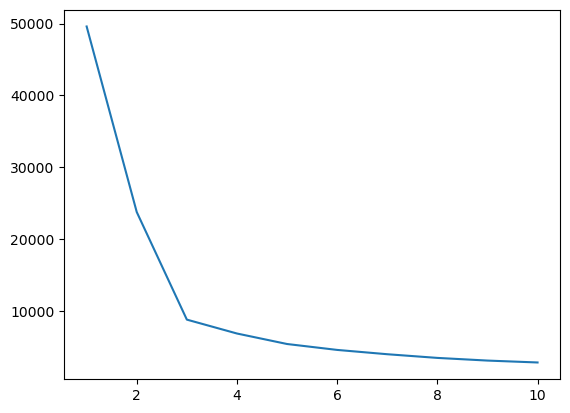

In [13]:
# Plot the DataFrame
# YOUR CODE HERE
plt.plot(k, inertia)

## Part 3: Segment the `customers_pca_df` DataFrame using the K-means algorithm.

In [14]:
import time

In [15]:
# %%timeit

# start=time.time()
# Define the model Kmeans model using the optimal value of k for the number of clusters.
# YOUR CODE HERE
km_pca=KMeans(n_clusters=3)

# Fit the model
# YOUR CODE HERE
km_pca.fit(customers_pca_df[['PCA1', 'PCA2']])

# print(f'Calculations took {time.time()-start} seconds')

# Make predictions
# YOUR CODE HERE

# Create a copy of the customers_pca_df DataFrame
# YOUR CODE HERE

# Add a class column with the labels
# YOUR CODE HERE

/Users/seshouan/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [16]:
# Plot the clusters
# YOUR CODE HERE
customers_pca_df['cluster_id']=km_pca.labels_
customers_pca_df.hvplot(kind='scatter', 
                        x='PCA1', 
                        y='PCA2', 
                        by='cluster_id')

:NdOverlay   [cluster_id]
   :Scatter   [PCA1]   (PCA2)

## Part 4: Segment the `customers_transformed_df` DataFrame with all factors using the K-means algorithm

In [17]:
# %%timeit
# start=time.time()
# Define the model Kmeans model using k=3 clusters
# YOUR CODE HERE
km=KMeans(n_clusters=3)

# Fit the model
# YOUR CODE HERE
km.fit(customers_transformed_df)

# print(f'Calculations took {time.time()-start} seconds')

# Make predictions
# YOUR CODE HERE

# Create a copy of the customers_transformed_df DataFrame
# YOUR CODE HERE

# Add a class column with the labels
# YOUR CODE HERE

/Users/seshouan/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [18]:
pca.explained_variance_ratio_

array([0.55083554, 0.30256389])

In [19]:
customers_transformed_df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,1.148534,4.606077,2.699069,-2.661824,1.526433,1.236671,0.211421,1.482896,-4.445627,-1.936831
1,-1.149410,-1.650549,2.530167,-3.227088,0.572138,4.162600,-0.291679,-1.237575,3.604765,-1.635689
2,0.332427,-0.887985,-0.309216,0.399891,0.828492,3.641945,-0.916946,-1.978024,1.056772,-1.882747
3,2.245599,3.826309,0.264039,0.095471,1.984380,0.373991,-0.280279,1.602786,-5.993331,-2.258925
4,0.705503,-1.312329,0.895406,-0.405408,1.116187,3.699562,-1.427985,-1.494409,1.156908,-1.434964
...,...,...,...,...,...,...,...,...,...,...
995,1.923516,2.387442,1.746617,-0.850014,1.333114,-0.522750,-0.699195,1.876106,-4.063120,-0.244857
996,-0.760810,-2.490720,1.530053,-1.501746,0.423792,5.947200,-1.271437,-3.398691,4.745373,-1.616856
997,1.259010,2.469579,2.766727,-2.218555,1.203872,0.255983,-0.411843,1.691254,-3.021626,-0.452561
998,-3.063652,-2.770077,2.086373,-3.500722,-0.767900,5.048482,0.444592,-3.050005,7.259299,-1.254483


In [20]:
customers_transformed_df['cluster_id']=km.labels_
customers_transformed_df.hvplot(kind='scatter', 
                        x='feature_3', 
                        y='feature_4', 
                        by='cluster_id')

:NdOverlay   [cluster_id]
   :Scatter   [feature_3]   (feature_4)

In [21]:
# Plot the clusters using the age and spending columns
# YOUR CODE HERE

In [22]:
compare_df=pd.DataFrame({'all_factors_clusters': km.labels_, 'pca_clusters': km_pca.labels_})
compare_df['same']=compare_df['all_factors_clusters']==compare_df['pca_clusters']
compare_df['same'].value_counts()

True     509
False    491
Name: same, dtype: int64

## Part 5: Compare the segmentation results between the PCA DataFrame and the full-factored DataFrame

**Answer:** YOUR ANSWER HERE